# Compare true Fibro features (w\*FC) vs double-dip features

In [1]:
import pickle

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/Fibromyalgia/'

demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))

print(demo.keys())

dict_keys(['Fibromyalgia', 'Age', 'Pain_Score', 'Rheumatology_Score_1', 'Rheumatology_Score_2', 'Hamilton_Depression_Score', 'Hamilton_Anxiety_Score', 'Fibromyalgia_Impact_Score', 'Weight', 'Height', 'BMI'])


In [2]:
import numpy as np

rest = []
epr = []
fibro = []

for sub in demo['Fibromyalgia']:
    try:
        p0 = np.load(f'{demodir}/fc/{sub}_task-rest_fc.npy')
        p1 = np.load(f'{demodir}/fc/{sub}_task-epr_fc.npy')
        f = demo['Fibromyalgia'][sub]
        rest.append(p0)
        epr.append(p1)
        fibro.append(f == 'Yes')
    except:
        pass
    
rest = np.stack(rest)
epr = np.stack(epr)
fibro = np.array(fibro)

print(len(rest), len(epr), len(fibro))

65 65 65


In [13]:
# Logistic on Fibromyalgia
# Cheating

from sklearn.linear_model import LogisticRegression

def rmse(a, b):
    return np.mean((a-b)**2)**0.5

errs = []
ws = []

for _ in range(20):
    idcs = np.random.permutation(65)[:50]

    xtr = rest[idcs]
    xt = epr[idcs]
    ytr = fibro[idcs]
    yt = fibro[idcs]

    reg = LogisticRegression(max_iter=1000).fit(xtr, ytr)
    ws.append(reg.coef_.squeeze())
    yhat = reg.predict(xt)
    err = np.mean(yhat == yt)
    print(err)
    errs.append(err)
    
ws = np.stack(ws)

print(np.mean(errs), np.std(errs))
print(ws.shape)

0.84
0.84
0.84
0.88
0.82
0.88
0.84
0.86
0.88
0.78
0.84
0.84
0.9
0.88
0.86
0.88
0.8
0.84
0.82
0.94
0.8530000000000001 0.035369478367654784
(20, 34716)


In [14]:
# Not Cheating

from sklearn.model_selection import train_test_split

ws2 = []

for _ in range(20):

    xrtr, xrt, xetr, xet, ytr, yt = train_test_split(rest, epr, fibro, stratify=fibro, train_size=50)

    xtr = xetr #np.concatenate([xrtr[:25], xetr[25:]])
    xt = xet #np.concatenate([xrt[:8], xet[8:]])

    reg = LogisticRegression(max_iter=1000).fit(xtr, ytr)
    ws2.append(reg.coef_.squeeze())
    yhat = reg.predict(xt)
    err = np.mean(yhat == yt)
    print(err)
    errs.append(err)
    
ws2 = np.stack(ws2)
    
print(np.mean(errs), np.std(errs))
print(ws2.shape)

0.5333333333333333
0.5333333333333333
0.3333333333333333
0.3333333333333333
0.5333333333333333
0.6666666666666666
0.3333333333333333
0.5333333333333333
0.6
0.5333333333333333
0.4666666666666667
0.6
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.6666666666666666
0.26666666666666666
0.13333333333333333
0.4666666666666667
0.6
0.6698333333333333 0.20810781126884956
(20, 34716)


In [7]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


/tmp/ipykernel_83089/2099469177.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


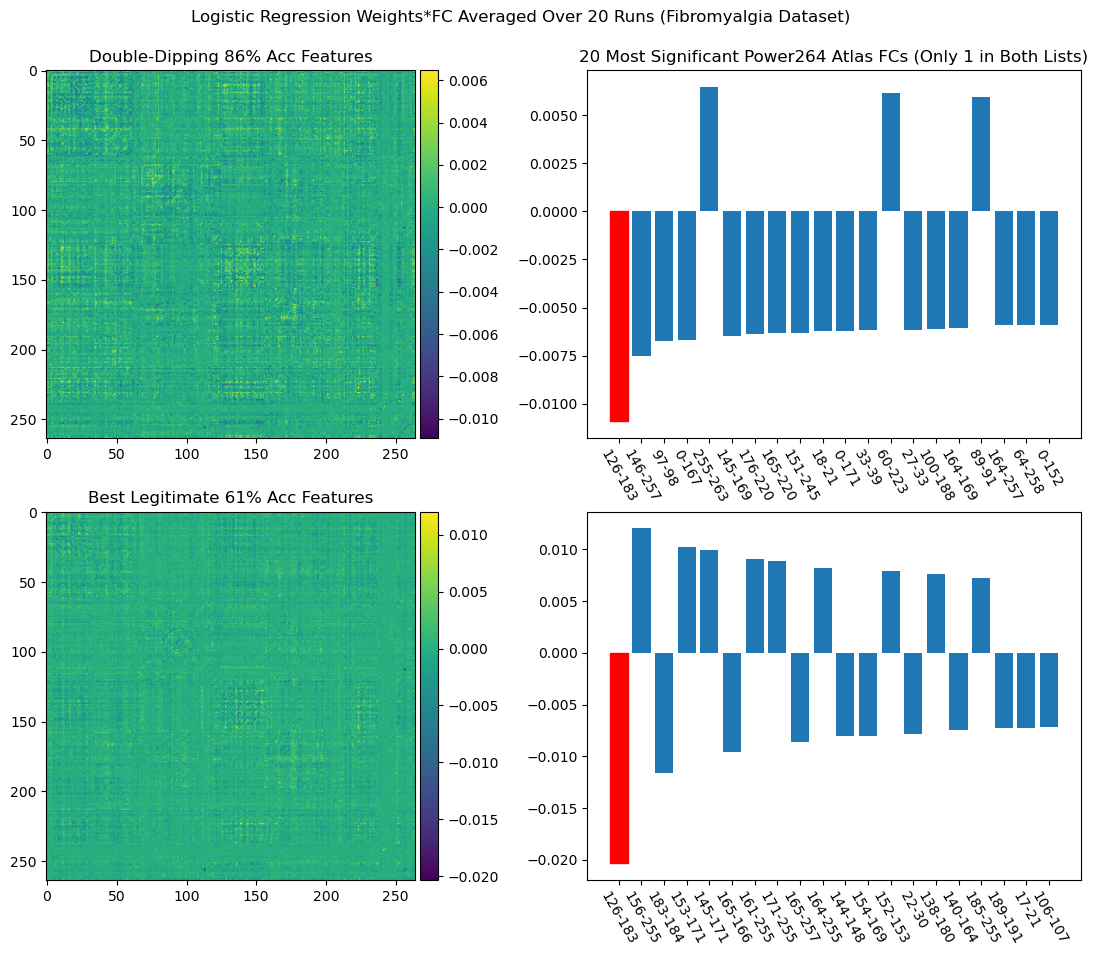

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

wmu = np.mean(ws, axis=0)
wmu2 = np.mean(ws2, axis=0)
fcmu = np.mean(np.concatenate([rest, epr], axis=0), axis=0)

feat = wmu*fcmu
feat2 = wmu2*fcmu

a,b = np.triu_indices(264,1)

N = 20

idcs = np.argsort(np.abs(feat))[::-1]
idcs2 = np.argsort(np.abs(feat2))[::-1]

fig, ax = plt.subplots(2,2,figsize=(14,10))

im = ax[0,0].imshow(remap(vec2mat(feat)))
ax[0,0].set_title('Double-Dipping 86% Acc Features')

divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)

fig.colorbar(im, cax=cax, orientation='vertical')

blist = ax[0,1].bar([f'{a[idx]}-{b[idx]}' for idx in idcs[:N]], feat[idcs[:N]])
ax[0,1].tick_params(axis='x', labelrotation=-60)

blist[0].set_color('r')
ax[0,1].set_title('20 Most Significant Power264 Atlas FCs (Only 1 in Both Lists)')

im = ax[1,0].imshow(remap(vec2mat(feat2)))
ax[1,0].set_title('Best Legitimate 61% Acc Features')

divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)

fig.colorbar(im, cax=cax, orientation='vertical')

blist = ax[1,1].bar([f'{a[idx]}-{b[idx]}' for idx in idcs2[:N]], feat2[idcs2[:N]])
ax[1,1].tick_params(axis='x', labelrotation=-60)

blist[0].set_color('r')

fig.suptitle('Logistic Regression Weights*FC Averaged Over 20 Runs (Fibromyalgia Dataset)')
fig.subplots_adjust(top=0.92)
fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/Identifiability/diff_feat_fibro.pdf')

In [36]:
np.intersect1d(idcs[:N], idcs2[:N])

array([25319])